## Udemy Pandas
### https://pandas.pydata.org/docs

## 1) Les séries pandas
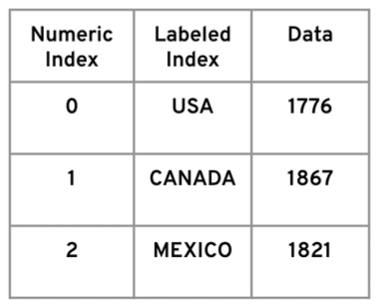

In [1]:
import numpy as np
import pandas as pd

In [2]:
# help(pd.Series)
my_index = ['USA','Canada','Mexico']
my_data = [1776,1867,1821]
my_ser = pd.Series(data=my_data)
print(my_ser)


0    1776
1    1867
2    1821
dtype: int64


In [3]:
my_ser2 = pd.Series(data=my_data,index=my_index)
print(my_ser2)
print(my_ser2[0])
print(my_ser2['USA'])

USA       1776
Canada    1867
Mexico    1821
dtype: int64
1776
1776


In [4]:
# Pandas sait directement transformer un dictionnaire en série pandas
ages = {'Sam':5,'Franck':10,'Arthur':7}
my_ser3 = pd.Series(ages)
print(my_ser3)
my_ser3.keys()

Sam        5
Franck    10
Arthur     7
dtype: int64


Index(['Sam', 'Franck', 'Arthur'], dtype='object')

## 2) Les dataframes

In [5]:
np.random.seed(101)
my_data = np.random.randint(0,101,(4,3))
print(my_data)
my_index= ['CA','NY','AZ','TX']
mycol = ['Jan','Feb','Mar']
df = pd.DataFrame(my_data,my_index, mycol)
df

[[95 11 81]
 [70 63 87]
 [75  9 77]
 [40  4 63]]


,Jan,Feb,Mar
CA,95,11,81
NY,70,63,87
AZ,75,9,77
TX,40,4,63


In [6]:
df.columns

Index(['Jan', 'Feb', 'Mar'], dtype='object')

In [7]:
df.index

Index(['CA', 'NY', 'AZ', 'TX'], dtype='object')

In [8]:
df.describe().transpose()
print(df)

    Jan  Feb  Mar
CA   95   11   81
NY   70   63   87
AZ   75    9   77
TX   40    4   63


In [45]:
df2 = pd.read_csv("auto.csv")

In [46]:
df2.head(n=3)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0


## Travail sur les colonnes

In [47]:
type(df2['weight'])

pandas.core.series.Series

In [48]:
df2[['mpg','origin']]

,mpg,origin
0,18.0,US
1,9.0,US
2,36.1,Asia
3,18.5,US
4,34.3,Europe
...,...,...
387,18.0,US
388,27.0,US
389,29.5,Asia
390,17.5,US


In [49]:
df2['Prod_hp_size'] = 10 + df2['hp']+df2['size']
df2.head(n=3)

,mpg,displ,hp,weight,accel,origin,size,Prod_hp_size
0,18.0,250.0,88,3139,14.5,US,15.0,113.0
1,9.0,304.0,193,4732,18.5,US,20.0,223.0
2,36.1,91.0,60,1800,16.4,Asia,10.0,80.0


In [50]:
# Pour retirer des colonnes, il faut préciser axis=1 car par défaut, ce sont des lignes
df2.drop('Prod_hp_size',axis=1).head(n=3)
# 
print('Il y a ', df2.shape[1],'colonnes')

Il y a  8 colonnes


In [51]:
# Pour retirer totalement, il faut ré-écrire sur le dataframe
df2 = df2.drop('Prod_hp_size',axis=1)
df2.head(n=3)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0


## Travail sur les lignes ou index

In [52]:
df2.set_index('weight')

# Si on veut que le changement soit permanent, il faut écrire sur la variable avec:
# df2 = df2.set_index('weight')
# Si toutefois, on veut revenir à la version indexée du début
# df2.reset_index()

,mpg,displ,hp,accel,origin,size
weight,,,,,,
3139,18.0,250.0,88,14.5,US,15.0
4732,9.0,304.0,193,18.5,US,20.0
1800,36.1,91.0,60,16.4,Asia,10.0
3525,18.5,250.0,98,19.0,US,15.0
2188,34.3,97.0,78,15.8,Europe,10.0
...,...,...,...,...,...,...
3021,18.0,250.0,88,16.5,US,15.0
2950,27.0,151.0,90,17.3,US,10.0
2135,29.5,98.0,68,16.6,Asia,10.0


In [53]:
print(df2.iloc[0])
# df2.loc['2950']

mpg        18.0
displ     250.0
hp           88
weight     3139
accel      14.5
origin       US
size       15.0
Name: 0, dtype: object


In [54]:
# df2.drop('1800', axis=0)

In [55]:
one_row = df2.iloc[0]
one_row

mpg        18.0
displ     250.0
hp           88
weight     3139
accel      14.5
origin       US
size       15.0
Name: 0, dtype: object

In [56]:
df2 = df2.append(one_row) 

In [57]:
df2.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [58]:
bool_series = df2['hp'] > 100
df2[bool_series]

,mpg,displ,hp,weight,accel,origin,size
1,9.0,304.0,193,4732,18.5,US,20.0
8,15.0,302.0,130,4295,14.9,US,20.0
9,17.0,302.0,140,3449,10.5,US,20.0
13,14.0,351.0,148,4657,13.5,US,20.0
14,15.0,400.0,150,3761,9.5,US,20.0
...,...,...,...,...,...,...,...
375,16.0,258.0,110,3632,18.0,US,15.0
379,13.0,318.0,150,3755,14.0,US,20.0
382,20.5,231.0,105,3425,16.9,US,15.0
385,20.0,156.0,122,2807,13.5,Asia,15.0


In [59]:
# On peut écrire la même chose en une seule ligne...
df2[df2['hp']>190]

,mpg,displ,hp,weight,accel,origin,size
1,9.0,304.0,193,4732,18.5,US,20.0
68,11.0,318.0,210,4382,13.5,US,20.0
73,12.0,429.0,198,4952,11.5,US,20.0
87,14.0,440.0,215,4312,8.5,US,20.0
190,14.0,454.0,220,4354,9.0,US,20.0
195,12.0,455.0,225,4951,11.0,US,20.0
222,14.0,455.0,225,3086,10.0,US,20.0
225,11.0,429.0,208,4633,11.0,US,20.0
252,13.0,440.0,215,4735,11.0,US,20.0
266,15.0,429.0,198,4341,10.0,US,20.0


In [60]:
options = [225,220]
df2[df2['hp'].isin(options)]

,mpg,displ,hp,weight,accel,origin,size
190,14.0,454.0,220,4354,9.0,US,20.0
195,12.0,455.0,225,4951,11.0,US,20.0
222,14.0,455.0,225,3086,10.0,US,20.0
270,14.0,455.0,225,4425,10.0,US,20.0


In [61]:
# Imprimons les deux derniers chiffres de weight
def last_two(num):
    return str(num)[-2:]
df2['last_two'] = df2['weight'].apply(last_two)

In [62]:
df2

,mpg,displ,hp,weight,accel,origin,size,last_two
0,18.0,250.0,88,3139,14.5,US,15.0,39
1,9.0,304.0,193,4732,18.5,US,20.0,32
2,36.1,91.0,60,1800,16.4,Asia,10.0,00
3,18.5,250.0,98,3525,19.0,US,15.0,25
4,34.3,97.0,78,2188,15.8,Europe,10.0,88
...,...,...,...,...,...,...,...,...
388,27.0,151.0,90,2950,17.3,US,10.0,50
389,29.5,98.0,68,2135,16.6,Asia,10.0,35
390,17.5,250.0,110,3520,16.4,US,15.0,20
391,25.1,140.0,88,2720,15.4,US,10.0,20


In [63]:
def price(ouf):
    if ouf < 15:
        return '$'
    elif ouf >=15 and ouf <30:
        return '$$'
    else:
        return '$$$'

df2['price'] = df2['size'].apply(price)
df2

,mpg,displ,hp,weight,accel,origin,size,last_two,price
0,18.0,250.0,88,3139,14.5,US,15.0,39,$$
1,9.0,304.0,193,4732,18.5,US,20.0,32,$$
2,36.1,91.0,60,1800,16.4,Asia,10.0,00,$
3,18.5,250.0,98,3525,19.0,US,15.0,25,$$
4,34.3,97.0,78,2188,15.8,Europe,10.0,88,$
...,...,...,...,...,...,...,...,...,...
388,27.0,151.0,90,2950,17.3,US,10.0,50,$
389,29.5,98.0,68,2135,16.6,Asia,10.0,35,$
390,17.5,250.0,110,3520,16.4,US,15.0,20,$$
391,25.1,140.0,88,2720,15.4,US,10.0,20,$


### Rappel sur la conversion d'une fonction en une fonction lambda    

In [64]:
def double(num):
    return num*2
print(double(2))
print('---------------')
lambda num : num*2

4
---------------


<function __main__.<lambda>(num)>

In [65]:
df2['hp'].apply(lambda num : num*2)

0      176
1      386
2      120
3      196
4      156
      ... 
388    180
389    136
390    220
391    176
0      176
Name: hp, Length: 393, dtype: int64

### Apply sur des colonnes multiples

In [66]:
def belle_voiture(hp,size):
    if hp > 100 and size > 15:
        return 'Nice Car'
    else:
        return 'Other'
    
df2[['hp','size']].apply(lambda df2: belle_voiture(df2['hp'],df2['size']), axis=1)    

0         Other
1      Nice Car
2         Other
3         Other
4         Other
         ...   
388       Other
389       Other
390       Other
391       Other
0         Other
Length: 393, dtype: object

In [67]:
df2['Quality'] = df2[['hp','size']].apply(lambda df2: belle_voiture(df2['hp'],df2['size']), axis=1)

In [68]:
df2

,mpg,displ,hp,weight,accel,origin,size,last_two,price,Quality
0,18.0,250.0,88,3139,14.5,US,15.0,39,$$,Other
1,9.0,304.0,193,4732,18.5,US,20.0,32,$$,Nice Car
2,36.1,91.0,60,1800,16.4,Asia,10.0,00,$,Other
3,18.5,250.0,98,3525,19.0,US,15.0,25,$$,Other
4,34.3,97.0,78,2188,15.8,Europe,10.0,88,$,Other
...,...,...,...,...,...,...,...,...,...,...
388,27.0,151.0,90,2950,17.3,US,10.0,50,$,Other
389,29.5,98.0,68,2135,16.6,Asia,10.0,35,$,Other
390,17.5,250.0,110,3520,16.4,US,15.0,20,$$,Other
391,25.1,140.0,88,2720,15.4,US,10.0,20,$,Other


In [69]:
df2['Quality2'] = np.vectorize(belle_voiture)(df2['hp'],df2['size'])

In [70]:
df2.head()

,mpg,displ,hp,weight,accel,origin,size,last_two,price,Quality,Quality2
0,18.0,250.0,88,3139,14.5,US,15.0,39,$$,Other,Other
1,9.0,304.0,193,4732,18.5,US,20.0,32,$$,Nice Car,Nice Car
2,36.1,91.0,60,1800,16.4,Asia,10.0,00,$,Other,Other
3,18.5,250.0,98,3525,19.0,US,15.0,25,$$,Other,Other
4,34.3,97.0,78,2188,15.8,Europe,10.0,88,$,Other,Other


## Statistique et triage de données

In [71]:
df2.describe()

,mpg,displ,hp,weight,accel,size
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,23.432061,194.553435,104.427481,2977.994911,15.538677,13.683206
std,7.799885,104.548054,38.451009,848.357522,2.755844,4.259536
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2226.000000,13.800000,10.000000
50%,22.500000,151.000000,93.000000,2807.000000,15.500000,10.000000
75%,29.000000,267.000000,125.000000,3613.000000,17.000000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


In [72]:
df2.sort_values('displ')

,mpg,displ,hp,weight,accel,origin,size,last_two,price,Quality,Quality2
201,29.0,68.0,49,1867,19.5,Europe,10.0,67,$,Other,Other
356,18.0,70.0,90,2124,13.5,Asia,7.5,24,$,Other,Other
281,19.0,70.0,97,2330,13.5,Asia,7.5,30,$,Other,Other
253,23.7,70.0,100,2420,12.5,Asia,7.5,20,$,Other,Other
60,31.0,71.0,65,1773,19.0,Asia,10.0,73,$,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...
252,13.0,440.0,215,4735,11.0,US,20.0,35,$$,Nice Car,Nice Car
190,14.0,454.0,220,4354,9.0,US,20.0,54,$$,Nice Car,Nice Car
222,14.0,455.0,225,3086,10.0,US,20.0,86,$$,Nice Car,Nice Car
195,12.0,455.0,225,4951,11.0,US,20.0,51,$$,Nice Car,Nice Car


In [73]:
df2.sort_values(['displ','hp'])

,mpg,displ,hp,weight,accel,origin,size,last_two,price,Quality,Quality2
201,29.0,68.0,49,1867,19.5,Europe,10.0,67,$,Other,Other
356,18.0,70.0,90,2124,13.5,Asia,7.5,24,$,Other,Other
281,19.0,70.0,97,2330,13.5,Asia,7.5,30,$,Other,Other
253,23.7,70.0,100,2420,12.5,Asia,7.5,20,$,Other,Other
18,32.0,71.0,65,1836,21.0,Asia,10.0,36,$,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...
252,13.0,440.0,215,4735,11.0,US,20.0,35,$$,Nice Car,Nice Car
190,14.0,454.0,220,4354,9.0,US,20.0,54,$$,Nice Car,Nice Car
195,12.0,455.0,225,4951,11.0,US,20.0,51,$$,Nice Car,Nice Car
222,14.0,455.0,225,3086,10.0,US,20.0,86,$$,Nice Car,Nice Car


In [74]:
# Pour avoir une idée des corrélations
df2.corr()

,mpg,displ,hp,weight,accel,size
mpg,1.000000,-0.805283,-0.777001,-0.832028,0.423660,-0.777591
displ,-0.805283,1.000000,0.896145,0.932873,-0.544017,0.950784
hp,-0.777001,0.896145,1.000000,0.864089,-0.688498,0.842346
weight,-0.832028,0.932873,0.864089,1.000000,-0.416927,0.897526
accel,0.423660,-0.544017,-0.688498,-0.416927,1.000000,-0.504828
size,-0.777591,0.950784,0.842346,0.897526,-0.504828,1.000000


In [75]:
# Pour dénombrer le nombre de catégoriels
df2['origin'].value_counts()

US        246
Asia       79
Europe     68
Name: origin, dtype: int64

In [76]:
my_map = {'Europe':'Eur','US':'States','Asia':'Asie'}
df2['origin'] = df2['origin'].map(my_map)

In [77]:
df2.head()

,mpg,displ,hp,weight,accel,origin,size,last_two,price,Quality,Quality2
0,18.0,250.0,88,3139,14.5,States,15.0,39,$$,Other,Other
1,9.0,304.0,193,4732,18.5,States,20.0,32,$$,Nice Car,Nice Car
2,36.1,91.0,60,1800,16.4,Asie,10.0,00,$,Other,Other
3,18.5,250.0,98,3525,19.0,States,15.0,25,$$,Other,Other
4,34.3,97.0,78,2188,15.8,Eur,10.0,88,$,Other,Other


## Les données manquantes
### Les conserver, les supprimer ou les remplacements...
#### np.nan ou pd.NA ou pd.NaT

In [2]:
df3 = pd.read_csv("movie_scores.csv")
df3.head()

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [3]:
df3[df3['pre_movie_score'].notnull()]

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0


In [5]:
df3[(df3['pre_movie_score'].isnull()) & (df3['first_name'].notnull())] 

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
2,Hugh,Jackman,51.0,m,NaN,NaN


In [6]:
df3.dropna(thresh=1)

,first_name,last_name,age,sex,pre_movie_score,post_movie_score
0,Tom,Hanks,63.0,m,8.0,10.0
2,Hugh,Jackman,51.0,m,NaN,NaN
3,Oprah,Winfrey,66.0,f,6.0,8.0
4,Emma,Stone,31.0,f,7.0,9.0
